In [4]:
#imports
import networkx as nx
import numpy as np
import csv
import matplotlib
import matplotlib.pylab as plt
import infomap as im
import pandas as pd;
%matplotlib inline
%matplotlib inline
import seaborn as sns
from matplotlib.ticker import FuncFormatter
from IPython.display import Image
from scipy.interpolate import griddata
import umap
from matplotlib import rc

In [5]:
#basic infomap generation and testing
from infomap import Infomap


fname1 = 'ComNet_all.csv'

# read in the network file (an edge list)
print(f'reading the network file : {fname1}\n')
G = nx.read_edgelist('./' + fname1, delimiter=',', nodetype=str)  # import as a simple graph, index nodes by integers (not strings)
print(len(list(G.edges())))
im = Infomap() #created the infomap instant
G_mapped = im.add_networkx_graph(G) #convert nx graph to im graph
im.run()

mod_ids = []
#im network visualization
print(f"Found {im.num_top_modules} modules with codelength: {im.codelength}")
for node in im.nodes:
    print(node.node_id, node.module_id, node.flow, G_mapped[node.node_id])

im_df = im.get_dataframe()
im.write_csv("InfoMapOutput.csv")

reading the network file : ComNet_all.csv

21867
  Infomap v2.3.0 starts at 2022-04-18 17:15:41Found 11 modules with codelength: 9.056825122892441
4 1 0.030273928751086556 Z01.7
6 1 0.01618877761009754 I49.8
39 1
  -> Input network: 
  -> No file output!
  -> Configuration: no-self-links
  OpenMP 201811 detected with 8 threads...
  -> Ordinary network input, using the Map Equation for first order network flows
Calculating global network flow using flow model 'undirected'... 
  -> Using undirected links.
  => Sum node flow: 1, sum link flow: 1
Build internal network with 1474 nodes and 21867 links...
Calculating one-level codelength... done!
 -> One-level codelength: 9.06055186
Calculating entropy rate... done!
  -> Entropy rate: 5.035423163

Trial 1/1 starting at 2022-04-18 17:15:41
Two-level compression: 0.041% 0% 
Partitioned to codelength 0.0139029023 + 9.04292222 = 9.056825123 in 11 modules.
Super-level compression: to codelength 9.056825123 in 11 top modules.

Recursive sub-struct

'InfoMapOutput.csv'

In [191]:
#convert ComNet csv data into infomap friendly network input file
import infomap

def convertData():
    fname1 = 'ComNet_all.csv'

    # read in the network file (an edge list)
    print(f'reading the network file : {fname1}\n')
    G = nx.read_edgelist('./' + fname1, delimiter=',', nodetype=str)  # import as a simple graph, index nodes by integers (not strings) 
    z = {} 
    z_flipped = {}
    edges_indexed = []
    node_vals = list(G.nodes().keys())
    edge_vals = list(G.edges())
    for i in range(len(node_vals)):
        z[i] = node_vals[i]
        z_flipped[node_vals[i]] = i
    for j in range(len(edge_vals)):
        edges_indexed.append((z_flipped[edge_vals[j][0]], z_flipped[edge_vals[j][1]]))
    return z, edges_indexed

nodes, edges = convertData()
f = open("ComNet_all.net", "a")
f.write("*Vertices 1474\n")
for i in range(len(nodes)):
    f.write(str(i+1) + " \"" + nodes[i]+"\"\n")
f.write("*Edges 21867\n")
for j in range(len(edges)):
    if( j == len(edges)-1):
        f.write(str(edges[j][0]) + " " + str(edges[j][1]))
    else:
        f.write(str(edges[j][0]) + " " + str(edges[j][1]) + "\n")
f.close()

reading the network file : ComNet_all.csv



In [198]:
#Community Detection methods findings
def findCommunities(networkName="ComNet_all.net", seed=1):
    im = infomap.Infomap(f"-s {seed}")
    im.read_file(networkName)
    
    print(f"Find communities in {networkName} with Infomap...")
    im.run()

    print(f"Found {im.num_top_modules} top modules with codelength: {im.codelength}")
    communityDict = {node.node_id: ":".join(map(str, node.path[:-1]))
                    for node in im.nodes}
    
    return im.codelength, [path for _, path in sorted(communityDict.items())]

def printCommunities(networkName="ComNet_all.net", seed=1, outfile="outfile.tree"):
    im = infomap.Infomap(f"-s {seed}")
    im.read_file(networkName)
    print(f"Find communities in {networkName} with Infomap...")
    im.run()
    print(f"Found {im.num_top_modules} top modules with codelength: {im.codelength}")
    print(f"Writing results to {outfile}")
    im.write_flow_tree(outfile)
    module_assignment = {}
    for node in im.tree:
        if(node.is_leaf):
            module_assignment[node.node_id] = node.module_id
    return im.codelength, module_assignment

printCommunities()

Find communities in ComNet_all.net with Infomap...Parsing undirected
Found 7 top modules with codelength: 9.058396994479644 network from file 'ComNet_all.net'... 
  Parsing vertices...
  -> 1474 physical nodes added
  Parsing links...
  -> 21867 links
Done!
-------------------------------------
  -> 1475 nodes
  -> 21867 links with total weight 21867
  Infomap v2.3.0 starts at 2022-04-18 21:05:24
  -> Input network: 
  -> No file output!
  -> Configuration: no-self-links
                    seed = 1
  OpenMP 201811 detected with 8 threads...
  -> Ordinary network input, using the Map Equation for first order network flows
Calculating global network flow using flow model 'undirected'... 
  -> Using undirected links.
  => Sum node flow: 1, sum link flow: 1
Build internal network with 1475 nodes and 21867 links...
Calculating one-level codelength... done!
 -> One-level codelength: 9.06055186
Calculating entropy rate... done!
  -> Entropy rate: 5.035423163

Writing results to outfile.tree


(9.058396994479644,
 {4: 1,
  6: 1,
  39: 1,
  241: 1,
  167: 1,
  0: 1,
  259: 1,
  59: 1,
  19: 1,
  30: 1,
  372: 1,
  38: 1,
  41: 1,
  177: 1,
  240: 1,
  224: 1,
  333: 1,
  2: 1,
  42: 1,
  165: 1,
  270: 1,
  57: 1,
  9: 1,
  539: 1,
  74: 1,
  315: 1,
  122: 1,
  393: 1,
  86: 1,
  266: 1,
  386: 1,
  95: 1,
  352: 1,
  21: 1,
  140: 1,
  139: 1,
  818: 1,
  153: 1,
  189: 1,
  129: 1,
  61: 1,
  92: 1,
  89: 1,
  28: 1,
  69: 1,
  131: 1,
  369: 1,
  155: 1,
  310: 1,
  219: 1,
  71: 1,
  62: 1,
  108: 1,
  455: 1,
  414: 1,
  3: 1,
  82: 1,
  307: 1,
  454: 1,
  561: 1,
  156: 1,
  548: 1,
  552: 1,
  152: 1,
  851: 1,
  339: 1,
  594: 1,
  530: 1,
  456: 1,
  371: 1,
  234: 1,
  345: 1,
  367: 1,
  97: 1,
  235: 1,
  25: 1,
  48: 1,
  75: 1,
  15: 1,
  436: 1,
  132: 1,
  90: 1,
  301: 1,
  819: 1,
  94: 1,
  175: 1,
  464: 1,
  197: 1,
  32: 1,
  23: 1,
  675: 1,
  166: 1,
  31: 1,
  461: 1,
  604: 1,
  1: 1,
  320: 1,
  470: 1,
  33: 1,
  180: 1,
  370: 1,
  419: 1,
  210

In [199]:
#SOLUTION LANDSCAPE VERIFICATION
#Analysis of partition robustness

# Distance threshold: The maximum weighted Jaccard distance between a cluster center and any other partition in the same cluster.
# Validation score: The fraction of validation partitions that fit into existing clusters.
# Validation set size: The number of partitions hold out when measuring the validation score.
# Accuracy: The threshold validation score for a complete solution landscape.


network = 'ComNet_all.net' #  A network with a peaked solutions landscape, characterized by relatively large difference in code length for similar solutions.
accuracy = 0.90
distance_threshold = 0.002 # Requires 100 partitions

n_validation = 10
n_resamples = 2000
currentValidationScore = 0.0
validation_data_df = pd.DataFrame(columns = ["n_validated","n_clusters","n_partitions","n_training","n_validation"])
partitions_df = pd.DataFrame()
niter = 5000

for i in range(niter):
    print(f"Iteration {i + 1}")
    codelength, communities = findCommunities(network, i)
    communities.insert(0, codelength)
    partitions_df = pd.concat([partitions_df, pd.DataFrame(communities, columns = [str(i)])], axis=1)
    
    if (i + 1) % (2 * n_validation) == 0:
        n_training = i + 1 - n_validation
        print(f"Running partition validation with {n_training} training partitions and {n_validation} validation partitions.")
        partitions_df.sort_values(by=0, axis=1, inplace=True)
        partitions_df.drop(0, axis=0, inplace=False).to_csv(r'results/partitions.csv', index=False, header=False, sep=' ')    
        !partition-validation/partition-validation -s 123 -t $distance_threshold --validation-sampling $n_training $n_validation $n_resamples results/partitions.csv results/partitions_clustering.txt
        validation_data_tmp_df = pd.read_csv('results/partitions_clustering_validation.txt', skiprows=1, header=None, delimiter=' ').rename(columns={0: "n_validated", 1: "n_clusters"})
        validation_data_tmp_df["n_partitions"] = i + 1
        validation_data_tmp_df["n_training"] = n_training
        validation_data_tmp_df["n_validation"] = n_validation
        currentValidationScore = validation_data_tmp_df['n_validated'].mean() / n_validation
        print(f"{100 * currentValidationScore}% of validation partitions fit in partition clusters from {n_training} training clusters.")
        validation_data_df = pd.concat([validation_data_df, validation_data_tmp_df], ignore_index=True)
        #validation_data_df = validation_data_df.append(validation_data_tmp_df, sort=False)
    if currentValidationScore > accuracy:
        break

Iteration 1
Parsing undirected network from file 'Find communities in ComNet_all.net with Infomap...ComNet_all.net'... 
  Parsing vertices...
  -> 1474 physical nodes added
  Parsing links...
  -> 21867 links
Done!
-------------------------------------
  -> 1475 nodes
  -> 21867 links with total weight 21867

Found 11 top modules with codelength: 9.056949635783987
  Infomap v2.3.0 starts at 2022-04-18 21:05:28
  -> Input network: 
  -> No file output!
  -> Configuration: no-self-links
                    seed = 0
  OpenMP 201811 detected with 8 threads...
  -> Ordinary network input, using the Map Equation for first order network flows
Calculating global network flow using flow model 'undirected'... 
  -> Using undirected links.
  => Sum node flow: 1, sum link flow: 1
Build internal network with 1475 nodes and 21867 links...
Calculating one-level codelength... done!
 -> One-level codelength: 9.06055186
Calculating entropy rate... done!
  -> Entropy rate: 5.035423163

Trial 1/1 starting

  n_validated n_clusters  n_partitions n_training n_validation  score
0           6          7            20         10           10    0.6
1           9         16            40         30           10    0.9
2           9         18            60         50           10    0.9
3           8         22            80         70           10    0.8
4           8         24           100         90           10    0.8
5           9         29           120        110           10    0.9
6           9         29           140        130           10    0.9
7          10         31           160        150           10    1.0
Empty DataFrame
Columns: [n_validated, n_clusters, n_partitions, n_training, n_validation, score]
Index: []


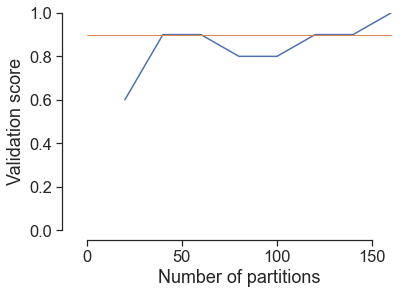

In [200]:
validation_data_df["score"] = (validation_data_df["n_validated"] / validation_data_df["n_validation"]).astype(float)
validation_data_df["n_partitions"] = validation_data_df["n_partitions"].astype(int)
sns.set(style="ticks", font_scale=1.5)
df = validation_data_df[~validation_data_df.index.duplicated()]
print(validation_data_df)
ax = sns.lineplot(x="n_partitions", y="score", markers=True, ci=95, data=validation_data_df)

print(validation_data_df[validation_data_df.index.duplicated()])
ax.set(ylabel="Validation score", xlabel="Number of partitions", ylim=(0,1))
##plt.legend(loc=4)
plt.plot([0, validation_data_df["n_partitions"].max()], [accuracy, accuracy], '-', lw=1)
sns.despine(offset=10, trim=True);

plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))
plt.savefig(f"results/validation_score_{network.split('.net')[0]}_d={distance_threshold}_a={accuracy}.png",
            bbox_inches="tight")

In [201]:
#IDENTIFYING PARTITION CLUSTERS
partitions_df.sort_values(by=0, axis=1,inplace=True)
codelengths = partitions_df.loc[0,:].to_numpy()
partitions_df.drop(0, axis=0,inplace=False).to_csv(r'results/partitions.csv',index=False,header=False,sep=' ')
!partition-validation/partition-validation -s 123 -t $distance_threshold results/partitions.csv results/partitions_clustering.txt

Version: Feb 23, 2022.
Command: partition-validation/partition-validation -s 123 -t 0.002 results/partitions.csv results/partitions_clustering.txt
Setup:
--> Using seed: 123
--> Will cluster partitions such that no partition is farther away from its center than: 0.002
--> Will read partitions from file: results/partitions.csv
--> Will write clusters to file: results/partitions_clustering.txt
--> Will use number of threads: 1
Reading partitions file with 160 partitions...of 1475 nodes...done!
Clustering 160 partitions:
--> Writing 31 clusters...done!


In [202]:
#IDENTIFYING CLUSTER SIZES AND CLUSTER CENTERS FROM RESULTS GENERATED
# Only influde best maxclusters clusters
maxclusters = 20
partition_clusters_df = pd.read_csv('results/partitions_clustering.txt', delimiter=' ', comment='#')
Nclusters = partition_clusters_df['ClusterId'].max()
print(f"Solution landscape contains {Nclusters} clusters with {partition_clusters_df.shape[0]} partitions.")

if Nclusters > maxclusters:
    partition_clusters_df.drop(partition_clusters_df[partition_clusters_df.ClusterId > maxclusters].index, inplace=True)
    Nclusters = partition_clusters_df['ClusterId'].max()
    print(f"Including only the best {Nclusters} clusters with {partition_clusters_df.shape[0]} partitions.")

#partition_clusters_df.head()


#Find cluster sizes
clusterSizes = partition_clusters_df['ClusterId'].value_counts(sort=False)
maxClusterSize = max(clusterSizes)
solution_landscape_df = clusterSizes.to_frame().rename(columns={'ClusterId':'clustersize'})

#Find cluster centers and code lengths
Nclusters = partition_clusters_df['ClusterId'].max()
clusterCenters = np.empty(Nclusters)

for clusterId in range(1, Nclusters + 1):
    clusterCenters[clusterId - 1] = partition_clusters_df['PartitionId'][(partition_clusters_df['ClusterId'] == clusterId).idxmax()]

clusterCenters = clusterCenters.astype(int)
clusterCenterCodelengths = codelengths[clusterCenters - 1]
solution_landscape_df['partitionid'] = clusterCenters.tolist()
solution_landscape_df['codelength'] = clusterCenterCodelengths.tolist()

print(solution_landscape_df)

#Result: pairwise cluster center distances
distances_df = pd.read_csv('results/partitions_clustering_distances.txt', delimiter=' ', comment='#')
distances_df.drop(distances_df[(distances_df['ClusterId1'] > maxclusters) | (distances_df['ClusterId2'] > maxclusters)].index, inplace=True)
distances_df.head()

Solution landscape contains 31 clusters with 160 partitions.
Including only the best 20 clusters with 126 partitions.
    clustersize  partitionid  codelength
1            11            1    9.056825
2             8           12    9.056950
3            34           20    9.056980
4             1           54    9.057025
5             1           55    9.057089
6            19           56    9.057105
7             5           75    9.057144
8             3           80    9.057180
9             1           83    9.057220
10            1           84    9.057240
11            1           85    9.057284
12           11           86    9.057299
13            2           97    9.057305
14            1           99    9.057305
15            4          100    9.057343
16            2          104    9.057417
17            1          106    9.057439
18           17          107    9.057498
19            2          124    9.057499
20            1          126    9.057543


,ClusterId1,ClusterId2,Distance
0,1,2,0.005073
1,1,3,0.003047
2,1,4,0.004060
3,1,5,0.009709
4,1,6,0.008113


Text(0.5, 1.0, 'Partition distance matrix')

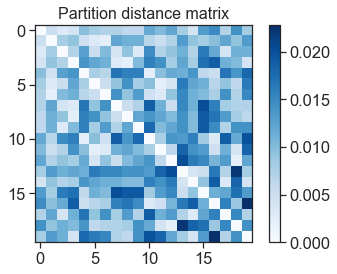

In [203]:
row = distances_df.to_numpy()[:,0].astype(int) - 1
col = distances_df.to_numpy()[:,1].astype(int) - 1
distances = distances_df.to_numpy()[:,2]
distance_matrix = np.zeros((Nclusters, Nclusters), dtype=distances.dtype)
distance_matrix[row, col] = distances
distance_matrix[col, row] = distances # Add transpose
plt.imshow(distance_matrix, zorder=2, cmap='Blues', interpolation='nearest')
plt.colorbar();
plt.title('Partition distance matrix', fontsize=16)

In [204]:
#find the two dimensional coords in UMAP
#from umap import UMAP
import umap.umap_ as umap

U = umap.UMAP(metric='precomputed', n_neighbors=Nclusters - 1, min_dist=distance_threshold)
out = U.fit_transform(X=distance_matrix, y=None)
solution_landscape_df['xcoord'] = out[:, 0]
solution_landscape_df['ycoord'] = out[:, 1]
solution_landscape_df.head()

/opt/anaconda3/lib/python3.8/site-packages/umap/umap_.py:1780: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")


,clustersize,partitionid,codelength,xcoord,ycoord
1,11,1,9.056825,3.718134,0.279302
2,8,12,9.056950,1.753701,-1.729717
3,34,20,9.056980,4.321874,0.320933
4,1,54,9.057025,3.577685,-0.668494
5,1,55,9.057089,1.453924,-0.605423


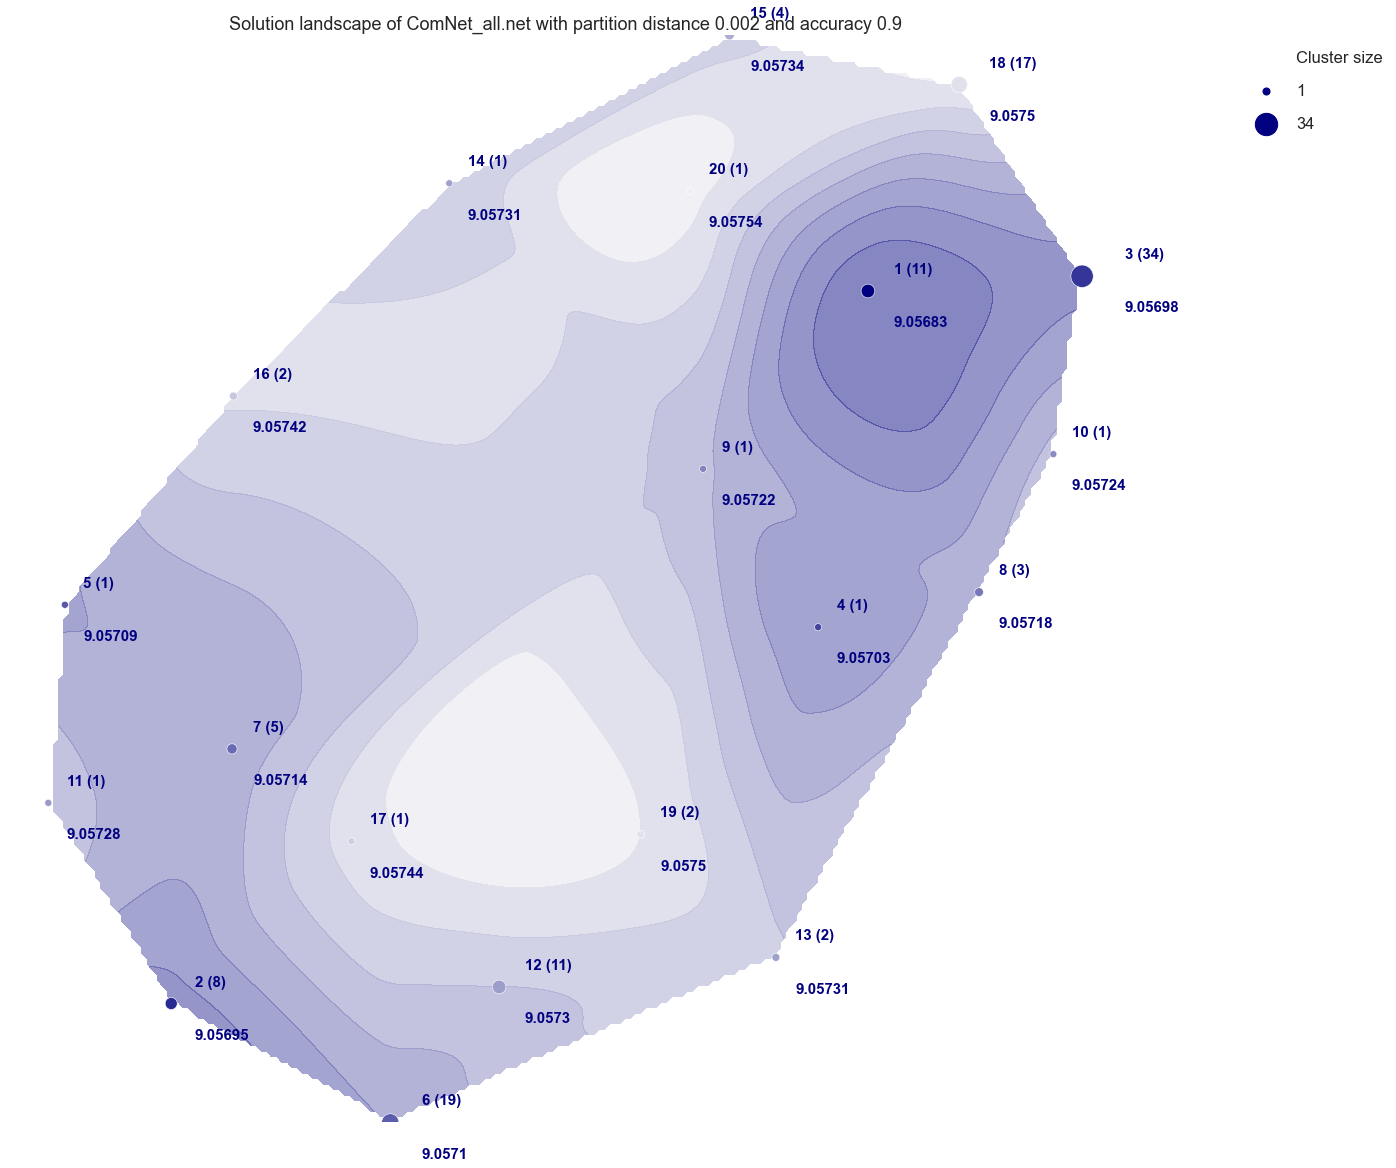

In [205]:
x = solution_landscape_df['xcoord'].values
y = solution_landscape_df['ycoord'].values
codelength = solution_landscape_df['codelength'].values

def plot_contour(x, y, codelength, resolution=200, contour_method='cubic'):
    resolution = f"{resolution}j"
    X, Y = np.mgrid[min(x):max(x):complex(resolution), min(y):max(y):complex(resolution)]
    points = list(zip(x, y))
    Z = griddata(points, codelength, (X, Y), method=contour_method)
    return X, Y, Z

X, Y, Z = plot_contour(x, y, codelength, resolution=200, contour_method='cubic')

palette = sns.light_palette("navy", reverse=True, as_cmap=True)
sns.set(style="whitegrid", font_scale=1.5)
f, ax = plt.subplots(figsize=(20, 20))
sns.despine(f, left=True, bottom=True)
p0 = ax.contourf(X, Y, Z, cmap=palette, alpha=0.5)
#cbaxes = f.add_axes([0.8, 0.1, 0.03, 0.8])
#cbar = f.colorbar(p0, cax=cbaxes)
p1 = sns.scatterplot(x="xcoord", y="ycoord", hue="codelength", size="clustersize",
            sizes=(50, 500), alpha=1, palette=palette, legend="full",
            data=solution_landscape_df)
plt.axis('equal')
plt.title(f'Solution landscape of {network} with partition distance {distance_threshold} and accuracy {accuracy}')
plt.xlabel('')
#plt.xlabel('Embedded partition distance')
plt.ylabel('')
plt.xticks([])
plt.yticks([])
handles, labels = ax.get_legend_handles_labels()
for handle in handles[Nclusters + 1:]:
    handle.set_color(palette(0))
labels[Nclusters + 1] = 'Cluster size'
handlestepsize = max(int((len(handles)-(Nclusters+1))/4),1)
plt.legend([handles[Nclusters + 1], handles[Nclusters + 2], handles[-1]],
           [labels[Nclusters + 1], labels[Nclusters + 2], labels[-1]],
           bbox_to_anchor=(1.1, 1), loc='upper left', frameon=False, ncol=1, labelspacing=1.1)

for clusterId in range(1, len(out) + 1):
    p1.text(solution_landscape_df['xcoord'].iloc[clusterId - 1] + 0.07 * solution_landscape_df['clustersize'].iloc[clusterId - 1] / maxClusterSize + 0.05,
            solution_landscape_df['ycoord'].iloc[clusterId - 1] - 0.1, 
            np.around(solution_landscape_df['codelength'].iloc[clusterId - 1], decimals=5),
            horizontalalignment='left', 
            size='small',
            color=palette(0),
            weight='semibold')
    p1.text(solution_landscape_df['xcoord'].iloc[clusterId - 1] + 0.07 *solution_landscape_df['clustersize'].iloc[clusterId - 1] / maxClusterSize + 0.05,
            solution_landscape_df['ycoord'].iloc[clusterId - 1] + 0.05,
            f"{clusterId} ({solution_landscape_df['clustersize'].iloc[clusterId - 1]})",
            horizontalalignment='left', 
            size='small',
            color=palette(0),
            weight='semibold')

plt.savefig(f"results/solution_landscape_{network.split('.net')[0]}_d={distance_threshold}_a={accuracy}.png",
            bbox_inches="tight") 

In [206]:
#Print two best partitions in first and second cluster and visualize their differences
#print(maxpartition_clusters_df["PartitionId"])

# for clusterRank in range(1, 21):
#     print(clusterRank)
#     for partitionRank in range(1, 3):
#         #partitionId = partition_clusters_df[partition_clusters_df['ClusterId'] == clusterRank].iloc[0][1]
#         seed = int(partitions_df.columns[partitionId - 1])      
#         print(seed)  
#         #printCommunities(network, seed, outfile=f"results/{network.split('.net')[0]}_cluster_{clusterRank}_partition_{1}.tree")
partition = {}
cluster1_df = partition_clusters_df[partition_clusters_df['ClusterId'] == 1]
p_ranks = np.array(cluster1_df['PartitionId'])
maxPartition = max(cluster1_df['PartitionId'])
for p_rank in p_ranks:
    print(p_rank, "BIG BREAK----------------------------------------")
    seed = int(partitions_df.columns[p_rank - 1])
    if(p_rank == 1):
        codeL, temp = printCommunities(network, seed, outfile=f"results/{network.split('.net')[0]}_cluster_{1}_partition_{p_rank}.ftree")
        partition = temp
    else:
        printCommunities(network, seed, outfile=f"results/{network.split('.net')[0]}_cluster_{1}_partition_{p_rank}.ftree")

1 BIG BREAK----------------------------------------
Parsing undirected network from file 'ComNet_all.net'... Find communities in ComNet_all.net with Infomap...

  Parsing vertices...
  -> 1474 physical nodes added
  Parsing links...
  -> 21867 links
Done!
-------------------------------------
  -> 1475 nodes
  -> 21867 links with total weight 21867
  Infomap v2.3.0 starts at 2022-04-18 21:07:13
  -> Input network: 
  -> No file output!
  -> Configuration: no-self-links
                    seed = 4
  OpenMP 201811 detected with 8 threads...
  -> Ordinary network input, using the Map Equation for first order network flows
Calculating global network flow using flow model 'undirected'... 
  -> Using undirected links.
  => Sum node flow: 1, sum link flow: 1
Build internal network with 1475 nodes and 21867 links...
Calculating one-level codelength... done!
 -> One-level codelength: 9.06055186
Calculating entropy rate... done!
  -> Entropy rate: 5.035423163

Trial 1/1 starting at 2022-04-18 F

In [216]:
#test of intializing original network with best partition found
im2 = infomap.Infomap(silent=True, num_trials=100)
im.initial_partition = partition
im2.read_file("ComNet_all.net")
im2.run()
print(f"Found {im2.num_top_modules} top modules with codelength: {im2.codelength}")
im2.write_flow_tree("InfoMapOutput.ftree")
im2.write_clu("InfoMapOutput.clu")


Found 12 top modules with codelength: 9.056825122892475


'InfoMapOutput.clu'